In [9]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from data_utils import generate_ground_truth_matrix, ground_truth_matrix_to_dataset, correlation, to_dataframe
from surprise import Reader
from surprise import Dataset
from surprise import KNNBasic, SVD
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise import accuracy

In [10]:
# Beta vs Pearson correlation

# np.random.seed(0)

def correlation_train(beta, correlation_metric):
    truth = generate_ground_truth_matrix(
        (1000, 1000), environment='latent-dynamic-v1')
    users, items, ratings, P, R = ground_truth_matrix_to_dataset(
        truth, quantization='onetofive', bias='full underlying', beta=beta)
    return correlation(P, truth, correlation_metric)


beta = np.linspace(0.01, 10, 10)
correlation = [correlation_train(i, 'spearman') for i in beta]
print(correlation)


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999998, 0.9999999999999998, 1.0]


/var/folders/p2/v6y91c591nq_2q129bwd64bc0000gn/T/ipykernel_95718/1632256913.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


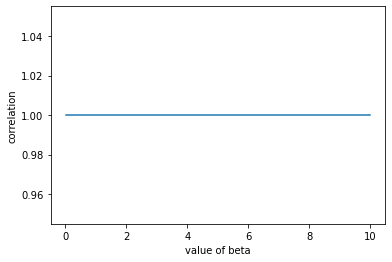

In [11]:
fig, ax = plt.subplots()
ax.plot(beta, correlation)
ax.set(xlabel='value of beta', ylabel='correlation')
fig.show()

In [12]:
# Plot P against R (flattened)

def P_R_train(beta):
    truth = generate_ground_truth_matrix(
        (1000, 1000), environment='latent-dynamic-v1')
    users, items, ratings, P, R = ground_truth_matrix_to_dataset(
        truth, quantization='onetofive', bias='full underlying', beta=beta)
    return P, R

beta = np.linspace(0.01, 3, 6)
results = [P_R_train(i) for i in beta]     

/var/folders/p2/v6y91c591nq_2q129bwd64bc0000gn/T/ipykernel_95718/2644875088.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


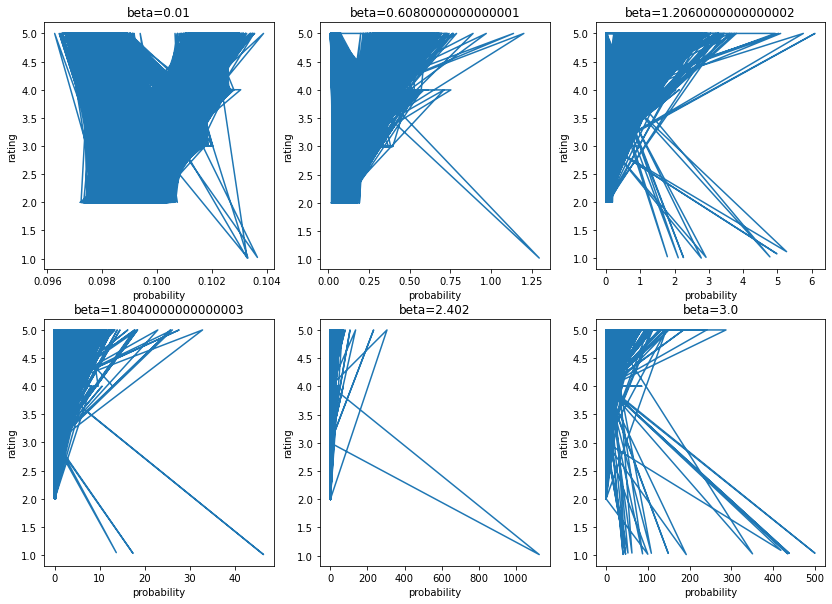

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(14, 10))
for i in range(6):
    axs[i // 3, i % 3].plot(results[i][0].flatten(), results[i][1].flatten())
    axs[i // 3, i % 3].set(xlabel='probability',
                           ylabel='rating', title=f'beta={beta[i]}')
fig.show()

In [14]:
knn = KNNBasic()
svd = SVD()

truth = generate_ground_truth_matrix(
    (1000, 1000), environment='latent-static-v1')
users, items, ratings, P, R = ground_truth_matrix_to_dataset(
    truth, quantization='onetofive', bias='popularity')
df = to_dataframe(ratings)

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=4, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    nan     nan     nan     nan     nan     nan     
MAE (testset)     nan     nan     nan     nan     nan     nan     
Fit time          9.82    9.19    9.15    9.41    9.39    0.27    
Test time         75.98   83.51   77.97   83.53   80.25   3.35    


{'test_rmse': array([nan, nan, nan, nan]),
 'test_mae': array([nan, nan, nan, nan]),
 'fit_time': (9.816308975219727,
  9.188931941986084,
  9.148048877716064,
  9.413958072662354),
 'test_time': (75.98385906219482,
  83.5115168094635,
  77.97422695159912,
  83.52720212936401)}